In [21]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, precision_score, accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## **Bitter Sweet Plots :**

---



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
bitter_train = pd.read_csv("/content/drive/MyDrive/Capstone/DataSets/bitter-train.tsv" , sep='\t')
bitter_test = pd.read_csv("/content/drive/MyDrive/Capstone/DataSets/bitter-test.tsv" , sep='\t')
sweet_train = pd.read_csv("/content/drive/MyDrive/Capstone/DataSets/sweet-train.tsv" , sep='\t')
sweet_test = pd.read_csv("/content/drive/MyDrive/Capstone/DataSets/sweet-test.tsv" , sep='\t')

In [10]:
bitter_train

,Name,Taste,Reference,SMILES,Canonical SMILES,Bitter
0,Sucrose,Sweet,Rojas et al. (2017),OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,False
1,"Sucralose / 4,1',6'-Trichloro-galactosucrose",Sweet,Rojas et al. (2017),ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,False
2,Alitame,Sweet,Rojas et al. (2017),CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,False
3,Aspartame/Aspartyl-phenylalanine methylester,Sweet,Rojas et al. (2017),COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,False
4,Tagatose,Sweet,Rojas et al. (2017),OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(C(C1O)O)O,False
...,...,...,...,...,...,...
2252,6-Methyl-2-pyridinemethanol,Bitter,The Good Scents Company Database,CC1=NC(=CC=C1)CO,OCc1cccc(n1)C,True
2253,4-hydroxybenzyl alcohol,Bitter,The Good Scents Company Database,C1=CC(=CC=C1CO)O,OCc1ccc(cc1)O,True
2254,4-Benzoylpyridine,Bitter,The Good Scents Company Database,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(c1ccncc1)c1ccccc1,True
2255,4-(5-Methyl-2-furyl)-2-butanone,Bitter,The Good Scents Company Database,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCc1ccc(o1)C,True


In [11]:
bitter_test

,Name,Taste,Reference,SMILES,Canonical SMILES,In Bitter Domain,Bitter
0,D-Fructose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,OC[C@]1(O)[C@@H](O)[C@H](O)[C@@H](CO1)O,OC[C@@]1(O)OC[C@H]([C@H]([C@@H]1O)O)O,1.0,False
1,D-Glucose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,OC[C@@H]1[C@@H](O)[C@H](O)[C@@H](O)[C@H](O1)O,OC[C@H]1O[C@H](O)[C@@H]([C@H]([C@@H]1O)O)O,1.0,False
2,D-Mannose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,OC[C@@H]1[C@@H](O)[C@H](O)[C@H](O)[C@H](O1)O,OC[C@H]1O[C@H](O)[C@H]([C@H]([C@@H]1O)O)O,1.0,False
3,L-Rhamnose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,C[C@H]1[C@H](O)[C@@H](O)[C@@H](O)[C@H](O1)O,O[C@H]1[C@H](C)O[C@@H]([C@@H]([C@@H]1O)O)O,1.0,False
4,D-Ribulose,Non-bitter,Wiener et al. (2017) - Phyto-Dictionary,OCC(=O)[C@H](O)[C@H](O)CO,OC[C@H]([C@H](C(=O)CO)O)O,1.0,False
...,...,...,...,...,...,...,...
166,NaN,Bitter,Wiener et al. (2017) - UNIMI,c1cc(O)c(O)cc1C[C@@H](C2=O)COc(c23)c(OC)c(OC)c...,COc1c2OC[C@H](C(=O)c2c(c(c1OC)O)O)Cc1ccc(c(c1)O)O,1.0,True
167,NaN,Bitter,Wiener et al. (2017) - UNIMI,c1cccc(c1C([O-])=O)NC(=O)/C=C/c2ccc(O)cc2,O=C(Nc1ccccc1C(=O)[O-])/C=C/c1ccc(cc1)O,1.0,True
168,NaN,Bitter,Wiener et al. (2017) - UNIMI,c1cccc(c1C([O-])=O)NC(=O)/C=C/c2cc(OC)c(cc2)OC,COc1cc(/C=C/C(=O)Nc2ccccc2C(=O)[O-])ccc1OC,1.0,True
169,NaN,Bitter,Wiener et al. (2017) - UNIMI,c1cccc(c1C([O-])=O)NC(=O)/C=C/c2cc(O)ccc2,O=C(Nc1ccccc1C(=O)[O-])/C=C/c1cccc(c1)O,1.0,True


In [12]:
sweet_train

,Name,Taste,Reference,SMILES,Canonical SMILES,Sweet
0,Sucrose,Sweet,Rojas et al. (2017),OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,True
1,"Sucralose / 4,1',6'-Trichloro-galactosucrose",Sweet,Rojas et al. (2017),ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,True
2,Aspartame/Aspartyl-phenylalanine methylester,Sweet,Rojas et al. (2017),COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,True
3,Tagatose,Sweet,Rojas et al. (2017),OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(C(C1O)O)O,True
4,Isomaltulose/Palatinose,Sweet,Rojas et al. (2017),OCC1OC(OCC2OC(C(C2O)O)(O)CO)C(C(C1O)O)O,OCC1OC(OCC2OC(C(C2O)O)(O)CO)C(C(C1O)O)O,True
...,...,...,...,...,...,...
2200,6-Methyl-2-pyridinemethanol,Bitter,The Good Scents Company Database,CC1=NC(=CC=C1)CO,OCc1cccc(n1)C,False
2201,4-hydroxybenzyl alcohol,Bitter,The Good Scents Company Database,C1=CC(=CC=C1CO)O,OCc1ccc(cc1)O,False
2202,4-Benzoylpyridine,Bitter,The Good Scents Company Database,C1=CC=C(C=C1)C(=O)C2=CC=NC=C2,O=C(c1ccncc1)c1ccccc1,False
2203,4-(5-Methyl-2-furyl)-2-butanone,Bitter,The Good Scents Company Database,CC1=CC=C(O1)CCC(=O)C,CC(=O)CCc1ccc(o1)C,False


In [13]:
sweet_test

,Name,Taste,Reference,SMILES,Canonical SMILES,In Bitter Domain,Sweet
0,Alitame,Sweet,Rojas et al. (2017),CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,NaN,True
1,Maltitol,Sweet,Rojas et al. (2017),OCC(C(C(C(CO)O)O)OC1OC(CO)C(C(C1O)O)O)O,OCC(C(C(C(CO)O)O)OC1OC(CO)C(C(C1O)O)O)O,NaN,True
2,Isomalt (Palatinit) / Isomaltitol,Sweet,Rojas et al. (2017),OCC(C(C(C(COC1OC(CO)C(C(C1O)O)O)O)O)O)O,OCC(C(C(C(COC1OC(CO)C(C(C1O)O)O)O)O)O)O,NaN,True
3,Erythritol,Sweet,Rojas et al. (2017),OCC(C(CO)O)O,OCC(C(CO)O)O,NaN,True
4,Rebaudioside B,Sweet,Rojas et al. (2017),OCC1OC(OC23CCC4C(C2)(CC3=C)CCC2C4(C)CCCC2(C)C(...,OCC1OC(OC23CCC4C(C2)(CC3=C)CCC2C4(C)CCCC2(C)C(...,NaN,True
...,...,...,...,...,...,...,...
156,Polypodoside A,Sweet,Rojas et al. (2017),O1[C@H](OC2CC[C@]3([C@H](C2)C(=O)C=C2[C@H]4CC[...,OCC1O[C@H](OC2CC[C@]3([C@H](C2)C(=O)C=C2[C@H]3...,NaN,True
157,Potassium glycyrrhizinate,Sweet,Rojas et al. (2017),[KH].O1[C@H](OC2CC[C@@]3([C@H]4[C@@](CC[C@H]3C...,OCC1O[C@H](OC2CC[C@]3([C@H](C2(C)C)CC[C@]2([C@...,NaN,True
158,Potassium saccharin,Sweet,Rojas et al. (2017),[KH].S1(=O)(=O)NC(=O)c2c1cccc2,O=C1NS(=O)(=O)c2c1cccc2.[KH],NaN,True
159,Pterocaryoside B,Sweet,Rojas et al. (2017),O1CC(O)C(O)C(O)[C@@H]1OC1[C@@H]2[C@@](CC[C@@H]...,OC(=O)CC[C@]1(C)C(CC[C@@]2([C@H]1CC(O[C@@H]1OC...,NaN,True


In [14]:
bitter_combined = pd.concat([bitter_train, bitter_test], ignore_index=True)

In [15]:
bitter_combined

,Name,Taste,Reference,SMILES,Canonical SMILES,Bitter,In Bitter Domain
0,Sucrose,Sweet,Rojas et al. (2017),OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,False,NaN
1,"Sucralose / 4,1',6'-Trichloro-galactosucrose",Sweet,Rojas et al. (2017),ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,False,NaN
2,Alitame,Sweet,Rojas et al. (2017),CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,CC(COCNC1C(C)(C)SC1(C)C)NCOCC(CC(=O)O)N,False,NaN
3,Aspartame/Aspartyl-phenylalanine methylester,Sweet,Rojas et al. (2017),COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,False,NaN
4,Tagatose,Sweet,Rojas et al. (2017),OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(C(C1O)O)O,False,NaN
...,...,...,...,...,...,...,...
2423,NaN,Bitter,Wiener et al. (2017) - UNIMI,c1cc(O)c(O)cc1C[C@@H](C2=O)COc(c23)c(OC)c(OC)c...,COc1c2OC[C@H](C(=O)c2c(c(c1OC)O)O)Cc1ccc(c(c1)O)O,True,1.0
2424,NaN,Bitter,Wiener et al. (2017) - UNIMI,c1cccc(c1C([O-])=O)NC(=O)/C=C/c2ccc(O)cc2,O=C(Nc1ccccc1C(=O)[O-])/C=C/c1ccc(cc1)O,True,1.0
2425,NaN,Bitter,Wiener et al. (2017) - UNIMI,c1cccc(c1C([O-])=O)NC(=O)/C=C/c2cc(OC)c(cc2)OC,COc1cc(/C=C/C(=O)Nc2ccccc2C(=O)[O-])ccc1OC,True,1.0
2426,NaN,Bitter,Wiener et al. (2017) - UNIMI,c1cccc(c1C([O-])=O)NC(=O)/C=C/c2cc(O)ccc2,O=C(Nc1ccccc1C(=O)[O-])/C=C/c1cccc(c1)O,True,1.0


In [16]:
sweet_combined = pd.concat([sweet_train, sweet_test], ignore_index=True)

In [17]:
sweet_combined

,Name,Taste,Reference,SMILES,Canonical SMILES,Sweet,In Bitter Domain
0,Sucrose,Sweet,Rojas et al. (2017),OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,OCC1OC(C(C1O)O)(CO)OC1OC(CO)C(C(C1O)O)O,True,NaN
1,"Sucralose / 4,1',6'-Trichloro-galactosucrose",Sweet,Rojas et al. (2017),ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,ClCC1OC(C(C1O)O)(CCl)OC1OC(CO)C(C(C1O)O)Cl,True,NaN
2,Aspartame/Aspartyl-phenylalanine methylester,Sweet,Rojas et al. (2017),COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,COC(=O)C(NC(=O)C(CC(=O)O)N)Cc1ccccc1,True,NaN
3,Tagatose,Sweet,Rojas et al. (2017),OCC1(O)OCC(C(C1O)O)O,OCC1(O)OCC(C(C1O)O)O,True,NaN
4,Isomaltulose/Palatinose,Sweet,Rojas et al. (2017),OCC1OC(OCC2OC(C(C2O)O)(O)CO)C(C(C1O)O)O,OCC1OC(OCC2OC(C(C2O)O)(O)CO)C(C(C1O)O)O,True,NaN
...,...,...,...,...,...,...,...
2361,Polypodoside A,Sweet,Rojas et al. (2017),O1[C@H](OC2CC[C@]3([C@H](C2)C(=O)C=C2[C@H]4CC[...,OCC1O[C@H](OC2CC[C@]3([C@H](C2)C(=O)C=C2[C@H]3...,True,NaN
2362,Potassium glycyrrhizinate,Sweet,Rojas et al. (2017),[KH].O1[C@H](OC2CC[C@@]3([C@H]4[C@@](CC[C@H]3C...,OCC1O[C@H](OC2CC[C@]3([C@H](C2(C)C)CC[C@]2([C@...,True,NaN
2363,Potassium saccharin,Sweet,Rojas et al. (2017),[KH].S1(=O)(=O)NC(=O)c2c1cccc2,O=C1NS(=O)(=O)c2c1cccc2.[KH],True,NaN
2364,Pterocaryoside B,Sweet,Rojas et al. (2017),O1CC(O)C(O)C(O)[C@@H]1OC1[C@@H]2[C@@](CC[C@@H]...,OC(=O)CC[C@]1(C)C(CC[C@@]2([C@H]1CC(O[C@@H]1OC...,True,NaN


In [18]:
bitter_combined.Bitter.value_counts()

False    1510
True      918
Name: Bitter, dtype: int64

In [19]:
sweet_combined.Sweet.value_counts()

True     1247
False    1119
Name: Sweet, dtype: int64

In [20]:
listFreqBitter = [1510, 918]
listFreqSweet = [1247, 1119]

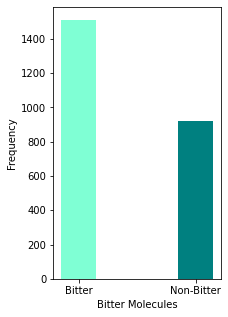

In [40]:
fig = plt.figure(figsize = (3, 5))
 
# creating the bar plot
plt.bar(['Bitter', 'Non-Bitter'], listFreqBitter, color =['aquamarine','teal'],
        width = 0.3, align='center')
 
plt.xlabel("Bitter Molecules")
plt.ylabel("Frequency")
plt.show()

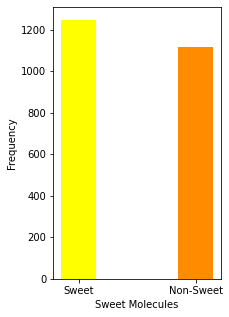

In [41]:
fig = plt.figure(figsize = (3, 5))
 
# creating the bar plot
plt.bar(['Sweet', 'Non-Sweet'], listFreqSweet, color =['yellow','darkorange'],
        width = 0.3, align='center')
 
plt.xlabel("Sweet Molecules")
plt.ylabel("Frequency")
plt.show()

## **ChemTasteDB Plots :**

---



In [46]:
chemTasteDB = pd.read_excel("/content/drive/MyDrive/Capstone/DataSets/ChemTasteDB/ChemTastesDB_database.xlsx")

In [47]:
chemTasteDB

,ID,Name,PubChem CID,CAS number,canonical SMILES,Taste,Class taste,Reference_(cod)/[pp]
0,0001,(-)-Haematoxylin,320930,517-28-2,Oc1cc2c(cc1O)C1c3ccc(c(c3OCC1(O)C2)O)O,Sweet,Sweetness,Arnoldi1995_((-)-1); Bassoli2001_(39)
1,0002,(+)-4β-hydroxyhernandulcin,126862,145385-64-4,CC(C)=CCCC(C)(O)C1CC(O)C(=CC1=O)C,Sweet,Sweetness,Kinghorn1998_(2); Kinghorn2002_(7); Kinghorn20...
2,0003,(+)-Dihydroquercetin 3-acetate,442540,78834-97-6,CC(=O)OC1C(Oc2cc(cc(c2C1=O)O)O)c1ccc(c(c1)O)O,Sweet,Sweetness,Bouysset2020_(175); Kinghorn2002_(26); Shallen...
3,0004,(+)-Haematoxylin,442514,517-28-2,Oc1cc2c(cc1O)C1c3ccc(c(c3OCC1(O)C2)O)O,Sweet,Sweetness,Arnoldi1995_((+)-1); Arnoldi1996_(12); Bassoli...
4,0005,(±)-chiro-inositol,892,643-12-9,OC1C(O)C(O)C(O)C(O)C1O,Sweet,Sweetness,Shallenberger1993_[149]
...,...,...,...,...,...,...,...,...
2942,2943,WS23,3016599,51115-71-0,CCNC(=O)C(C)(C(C)C)C(C)C,Cooling,Miscellaneous,Ley2012_[28]
2943,2944,WS3,62907,39711-79-0,CCNC(=O)C1CC(C)CCC1C(C)C,Cooling,Miscellaneous,Ley2012_[28]
2944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2945,NaN,"^ Chemical compound information (name, PubChem...",NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
chemTasteDB = chemTasteDB.iloc[0:2944 , :]

In [49]:
chemTasteDB

,ID,Name,PubChem CID,CAS number,canonical SMILES,Taste,Class taste,Reference_(cod)/[pp]
0,0001,(-)-Haematoxylin,320930,517-28-2,Oc1cc2c(cc1O)C1c3ccc(c(c3OCC1(O)C2)O)O,Sweet,Sweetness,Arnoldi1995_((-)-1); Bassoli2001_(39)
1,0002,(+)-4β-hydroxyhernandulcin,126862,145385-64-4,CC(C)=CCCC(C)(O)C1CC(O)C(=CC1=O)C,Sweet,Sweetness,Kinghorn1998_(2); Kinghorn2002_(7); Kinghorn20...
2,0003,(+)-Dihydroquercetin 3-acetate,442540,78834-97-6,CC(=O)OC1C(Oc2cc(cc(c2C1=O)O)O)c1ccc(c(c1)O)O,Sweet,Sweetness,Bouysset2020_(175); Kinghorn2002_(26); Shallen...
3,0004,(+)-Haematoxylin,442514,517-28-2,Oc1cc2c(cc1O)C1c3ccc(c(c3OCC1(O)C2)O)O,Sweet,Sweetness,Arnoldi1995_((+)-1); Arnoldi1996_(12); Bassoli...
4,0005,(±)-chiro-inositol,892,643-12-9,OC1C(O)C(O)C(O)C(O)C1O,Sweet,Sweetness,Shallenberger1993_[149]
...,...,...,...,...,...,...,...,...
2939,2940,Spilanthol,5353001,25394-57-4,CC=CC=CCCC=CC(=O)NCC(C)C,"Heating, pungent, and tingling",Miscellaneous,Ley2012_[26]
2940,2941,Tannic acid,16129778,1401-55-4,Oc1cc(cc(c1O)O)C(=O)Oc1cc(cc(c1O)O)C(=O)OCC1OC...,Astringent,Miscellaneous,Ley2012_[29]
2941,2942,trans-Pellitorine,5318516,18836-52-7,CCCCCC=CC=CC(=O)NCC(C)C,"Heating, pungent, and tingling",Miscellaneous,Ley2012_[26]
2942,2943,WS23,3016599,51115-71-0,CCNC(=O)C(C)(C(C)C)C(C)C,Cooling,Miscellaneous,Ley2012_[28]


In [51]:
chemTasteDB['Class taste'].value_counts()

Bitterness       1183
Sweetness         977
Non-sweetness     233
Tastelessness     203
Multitaste        113
Umaminess          98
Miscellaneous      87
Sourness           38
Saltiness          12
Name: Class taste, dtype: int64

In [52]:
listFreqChem = [1183, 977, 233, 203, 113, 98, 87, 38, 12]

In [54]:
classes = ['Bitterness', 'Sweetness', 'Non-sweetness', 'Tastelessness', 'Multitaste', 'Umaminess','Miscellaneous', 'Sourness', 'Saltiness']

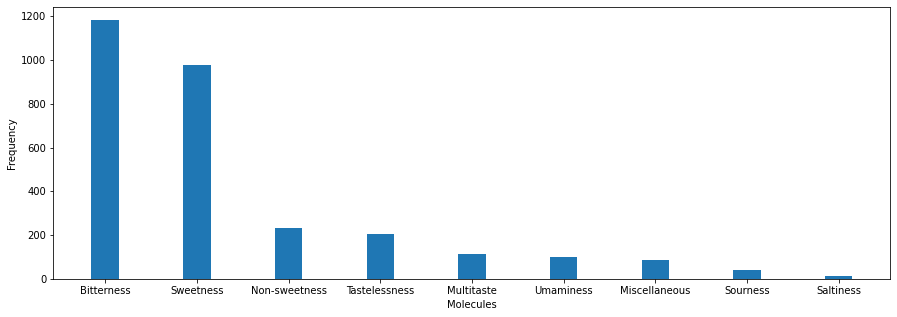

In [57]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(classes, listFreqChem,
        width = 0.3, align='center')
 
plt.xlabel("Molecules")
plt.ylabel("Frequency")
plt.show()